# Practical Case: Image Classification

## 1. Dataset

In [1]:
!pip install --upgrade tensorflow

In [2]:
from tensorflow.keras import datasets

2023-12-18 12:57:10.827248: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [3]:
fashion_mnist = datasets.fashion_mnist

In [4]:
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

## 2. Dataset Visualization

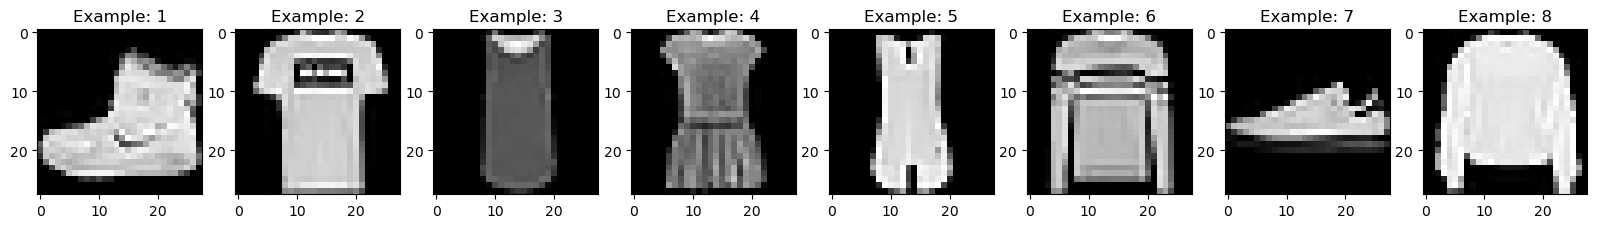

Training subset length:  60000
Test subset length:  10000


In [6]:
import numpy as np
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 4))

for index, img in zip(range(1, 9), X_train[:8]):
    plt.subplot(1, 8, index)
    plt.imshow(img, cmap=plt.cm.gray)
    plt.title('Example: ' + str(index))

plt.show()

print("Training subset length: ", len(X_train))
print("Test subset length: ", len(X_test))


## 3. Dataset Transformation

In [9]:
X_train_prep = X_train.reshape((60000, 28*28))
X_test_prep = X_test.reshape((10000, 28*28))

In [10]:
from sklearn.preprocessing import Normalizer

transformer = Normalizer()
X_train_prep = transformer.fit_transform(X_train_prep)
X_test_prep = transformer.transform(X_test_prep)

In [11]:
from tensorflow.keras.utils import to_categorical

y_train_prep = to_categorical(y_train)
y_test_prep = to_categorical(y_test)

## 4.Model Construction

In [12]:
from tensorflow.keras import models
from tensorflow.keras import layers

network = models.Sequential()

network.add(layers.Dense(300, activation='relu', input_shape=(28*28,)))
network.add(layers.Dense(100, activation='relu'))
network.add(layers.Dense(10, activation='softmax'))

In [13]:
network.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy', 'Precision']
)

In [14]:
history = network.fit(
    X_train_prep,
    y_train_prep,
    batch_size=32,
    epochs=15,
    validation_data=(X_test_prep, y_test_prep)
)

Epoch 1/15
1875/1875 [==============================] - 13s 7ms/step - loss: 0.5147 - accuracy: 0.8148 - precision: 0.8684 - val_loss: 0.4324 - val_accuracy: 0.8407 - val_precision: 0.8738
Epoch 2/15
1875/1875 [==============================] - 10s 5ms/step - loss: 0.3702 - accuracy: 0.8635 - precision: 0.8904 - val_loss: 0.3916 - val_accuracy: 0.8592 - val_precision: 0.8857
Epoch 3/15
1875/1875 [==============================] - 11s 6ms/step - loss: 0.3307 - accuracy: 0.8784 - precision: 0.9021 - val_loss: 0.3517 - val_accuracy: 0.8748 - val_precision: 0.8967
Epoch 4/15
1875/1875 [==============================] - 13s 7ms/step - loss: 0.3061 - accuracy: 0.8866 - precision: 0.9074 - val_loss: 0.3415 - val_accuracy: 0.8776 - val_precision: 0.8983
Epoch 5/15
1875/1875 [==============================] - 10s 6ms/step - loss: 0.2875 - accuracy: 0.8921 - precision: 0.9115 - val_loss: 0.3437 - val_accuracy: 0.8776 - val_precision: 0.8946
Epoch 6/15
1875/1875 [==============================] -